# Project 2

### <div class="alert alert-block alert-danger"><b>Practice in Birmingham: Educational Finances of Alabama</b></div>

Educational finance is crucial because it plays a key role in ensuring all students have access to high-quality education. Capital outlay expenditure helps school districts maintain infrastructure, promote economic growth, and provide resources for students to succeed. We will analyze an educational finances dataset to learn which factors influence the capital outlay expenditure in Alabama school districts.

### Objectives:
1. Explore relationships between variables and capital outlay expenditure using multiple linear regression.
2. Perform residual analysis and assess model assumptions.
3. Apply Box-Cox transformation to handle skewed distributions.
4. Explore correlations between residuals and other variables.
5. Perform ANOVA to evaluate model significance.

Go to [Kaggle](https://www.kaggle.com/datasets/noriuk/us-educational-finances) and download the dataset file `districts.csv` to your local directory.

### Step 1: Data Preparation

Using the following R scripts, read the `districts.csv` file and filter the school districts from Alabama into a new object `districts_AL`.

In [1]:
library(readr)

# Read the dataset
districts <- read_csv("data/districts.csv")
head(districts)

Warning message:
“package ‘readr’ was built under R version 4.2.3”
Rows: 374161 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): STATE, NAME
dbl (11): ENROLL, YRDATA, TOTALREV, TFEDREV, TSTREV, TLOCREV, TOTALEXP, TCUR...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,9609,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401,1506
Alabama,30931,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439,9749
Alabama,912,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975,110
Alabama,2842,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274,4133
Alabama,3322,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122,486
Alabama,7870,BLOUNT COUNTY SCHOOL DISTRICT,2016,69966,6929,48563,14474,68297,37442,22662,5500,2193


In [9]:
districts_AL <- districts[districts$STATE == "Alabama", ]
summary(districts_AL)

    STATE               ENROLL          NAME               YRDATA    
 Length:3255        Min.   :    0   Length:3255        Min.   :1992  
 Class :character   1st Qu.: 2109   Class :character   1st Qu.:1998  
 Mode  :character   Median : 3102   Mode  :character   Median :2004  
                    Mean   : 5655                      Mean   :2004  
                    3rd Qu.: 5915                      3rd Qu.:2010  
                    Max.   :66883                      Max.   :2016  
                    NA's   :129                                      
    TOTALREV         TFEDREV           TSTREV          TLOCREV      
 Min.   :   747   Min.   :    56   Min.   :     0   Min.   :   141  
 1st Qu.: 14050   1st Qu.:  1474   1st Qu.:  8706   1st Qu.:  3154  
 Median : 23129   Median :  2645   Median : 13943   Median :  5713  
 Mean   : 42595   Mean   :  4637   Mean   : 24487   Mean   : 13471  
 3rd Qu.: 41728   3rd Qu.:  4682   3rd Qu.: 23758   3rd Qu.: 12588  
 Max.   :618181   Max.   :

In [10]:
districts_AL[districts_AL$TCAPOUT==0,]

STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,615,ELBA CITY SCHOOL DISTRICT,2016,7152,993,4367,1792,7238,3824,2705,642,0
Alabama,518,LINDEN CITY SCHOOL DISTRICT,2016,5672,863,3617,1192,5448,2772,2151,498,0
Alabama,1228,SHEFFIELD CITY SCH DIST,2007,12524,1723,6876,3925,12628,7374,4321,907,0
Alabama,1685,JACKSONVILLE CITY SCHOOL DISTRICT,2006,12084,962,8284,2838,11712,7222,3479,874,0
Alabama,1061,BARBOUR COUNTY SCHOOL DISTRICT,2013,10444,2650,5850,1944,10628,5318,3858,1223,0
Alabama,2240,CRENSHAW COUNTY SCHOOL DISTRICT,2013,19618,2742,12272,4604,19523,10836,6443,2119,0
Alabama,519,LINDEN CITY SCHOOL DISTRICT,2013,5513,811,3481,1221,5241,2394,2289,538,0
Alabama,925,BARBOUR COUNTY SCHOOL DISTRICT,2015,10519,2518,5632,2369,10314,5249,3835,1018,0
Alabama,564,LINDEN CITY SCHOOL DISTRICT,2015,5258,754,3373,1131,5107,2568,1911,602,0


In [26]:
districts_AL <- na.omit(districts_AL)

### Step 2: Build Multiple Linear Regression Model

Fit a multiple linear regression model with `TCAPOUT` (Capital Outlay Expenditure) as the dependent variable. Include relevant independent variables like total revenue (`TOTALREV`), enrollment (`ENROLL`), and total current instructional spending (`TCURINST`).

In [27]:
# Fit multiple linear regression model
model <- lm(TCAPOUT ~ TOTALREV + ENROLL + TCURINST, data = districts_AL)

# View model summary
summary(model)


Call:
lm(formula = TCAPOUT ~ TOTALREV + ENROLL + TCURINST, data = districts_AL)

Residuals:
   Min     1Q Median     3Q    Max 
-43404  -1530   -533    306 103944 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -165.79460  144.41113  -1.148    0.251    
TOTALREV       0.25817    0.02048  12.608  < 2e-16 ***
ENROLL        -0.03425    0.04734  -0.724    0.469    
TCURINST      -0.29476    0.04334  -6.801 1.24e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6581 on 3122 degrees of freedom
Multiple R-squared:  0.4981,	Adjusted R-squared:  0.4976 
F-statistic:  1033 on 3 and 3122 DF,  p-value: < 2.2e-16


#### Analysis of Regression Results

1. **Model Summary**:
   - The model predicts the **Capital Outlay Expenditure (`TCAPOUT`)** using three independent variables: **Total Revenue (`TOTALREV`)**, **Enrollment (`ENROLL`)**, and **Total Current Instructional Spending (`TCURINST`)**.
   - The formula for the model is:  
   $$
   \text{Capital Outlay Expenditure} = -165.79 + 0.25817 \cdot \text{TOTALREV} - 0.03425 \cdot \text{ENROLL} - 0.29476 \cdot \text{TCURINST}
   $$

2. **Interpretation of Coefficients**:
   - **Intercept** (Estimate = -165.79, p-value = 0.251): The intercept is **not statistically significant** (p-value > 0.05). This does not have a meaningful real-world interpretation here, as a capital outlay cannot be negative or exist with zero revenue, zero enrollment, and zero instructional spending. In practical terms, a non-significant intercept does not undermine the overall interpretation of the model, but it may indicate that the range of values for the independent variables does not pass close to zero, or that the intercept is simply not relevant for prediction purposes in this context.

   - **TOTALREV** (Estimate = 0.25817): A positive coefficient indicates that an increase in total revenue by one unit (in thousands or millions, depending on the dataset scale) is associated with an increase of approximately 0.258 units in capital outlay expenditure, holding other factors constant. The small p-value (`< 2e-16`) shows that this variable is statistically significant in predicting capital outlay expenditure.
   - **ENROLL** (Estimate = -0.03425): The coefficient is slightly negative, indicating a small decrease in capital outlay expenditure with an increase in enrollment, holding other factors constant. However, with a p-value of 0.469, this variable is **not statistically significant**, meaning it might not be a strong predictor of capital outlay expenditure in this model.
   - **TCURINST** (Estimate = -0.29476): This variable also shows a negative relationship with capital outlay expenditure, indicating that an increase in current instructional spending is associated with a decrease in capital outlay expenditure. This relationship is statistically significant with a very low p-value of `1.24e-11`.

3. **R-squared and Model Fit**:
   - The **Multiple R-squared** value is **0.4981**, indicating that approximately 49.8% of the variability in capital outlay expenditure can be explained by the model. This suggests a moderate fit of the model to the data.
   - The **Adjusted R-squared** value of **0.4976** confirms the R-squared value, slightly adjusted for the number of predictors.

4. **Residual Analysis**:
   - The residual standard error of **6581** indicates the average amount by which the observed values deviate from the fitted values. This measure helps to understand the variability of the residuals.

5. **F-statistic and p-value**:
   - The model’s overall F-statistic of **1033** with a p-value **< 2.2e-16** indicates that the model is statistically significant as a whole. In other words, at least one of the predictors (Total Revenue, Enrollment, or Instructional Spending) is significantly related to capital outlay expenditure.

#### Key Findings:
- **Total Revenue** (`TOTALREV`) is a strong and statistically significant predictor of capital outlay expenditure.
- **Total Current Instructional Spending** (`TCURINST`) is also statistically significant but shows a negative relationship, indicating that higher spending on instructional activities might be associated with lower capital outlay expenditure.
- **Enrollment** (`ENROLL`) was not found to be statistically significant, suggesting it may not be as influential in predicting capital outlay expenditure based on this model.

#### Possible Next Steps:
1. **Residual Analysis**: Proceed with checking residual plots to assess model assumptions of normality, linearity, and homoscedasticity.
2. **Box-Cox Transformation**: Consider applying a transformation to the dependent variable if residual plots indicate skewness.
3. **Add New Variables**: Explore adding or removing variables based on domain knowledge or exploratory data analysis to improve model accuracy.

### Step 3: Evaluate Model and Check Residuals

To evaluate the model, we will check the following assumptions:

1. **Linearity**: The relationship between the predictors and the outcome variable should be linear.
2. **Normality of Residuals**: The residuals (errors) should be approximately normally distributed.
3. **Homoscedasticity**: The variance of residuals should remain constant across levels of the independent variables.
4. **Independence**: The residuals should not show patterns of correlation.

To assess these assumptions, we will plot the residuals and perform diagnostic checks.

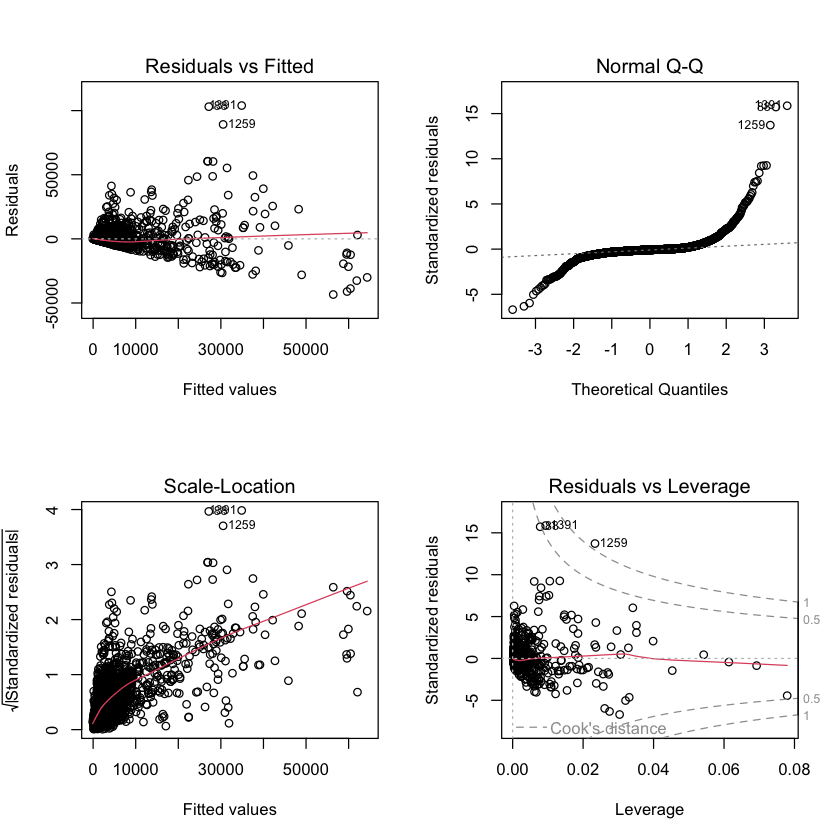

In [28]:
par(mfrow = c(2, 2))  # Create a 2x2 plot layout for diagnostic plots
plot(model)

#### Analysis of Residual Diagnostic Plots

1. **Residuals vs Fitted Plot**:
   - **Purpose**: This plot checks for linearity and homoscedasticity (constant variance).
   - **Ideal Situation**: The red line should be relatively horizontal, and the residuals should be randomly scattered around zero without forming clear patterns.
   - **Observation**: In the plot, the red line appears mostly horizontal but shows a slight curve. This suggests a potential minor issue with non-linearity. Additionally, if the residuals exhibit more spread at certain fitted values, that indicates heteroscedasticity (non-constant variance).

2. **Normal Q-Q Plot**:
   - **Purpose**: This plot assesses whether the residuals follow a normal distribution.
   - **Ideal Situation**: The points should fall approximately along the diagonal line.
   - **Observation**: There is some deviation from the diagonal line, particularly at the tails. This indicates that the residuals might not be perfectly normally distributed. Slight deviations are normal, but significant deviations may require transformation.

3. **Scale-Location Plot**:
   - **Purpose**: This plot checks for homoscedasticity, or constant variance of the residuals.
   - **Ideal Situation**: The red line should be flat, and the residuals should be evenly spread across the range of fitted values.
   - **Observation**: The red line appears relatively flat, but there are some variations towards the higher fitted values. This suggests that the variance might not be perfectly constant, indicating mild heteroscedasticity.

4. **Residuals vs Leverage Plot**:
   - **Purpose**: This plot identifies influential observations that may disproportionately affect the model fit.
   - **Ideal Situation**: Most points should lie within the dashed lines, indicating low leverage and influence.
   - **Observation**: Most of the points fall within the bounds of the Cook’s distance lines, and there are no clear indications of highly influential points. This suggests that no single observation is unduly influencing the model.

### Next Steps Based on Residual Checks:
1. **Box-Cox Transformation**: Given the slight deviations from normality and minor issues with non-linearity, consider applying a **Box-Cox transformation** to the dependent variable (`TCAPOUT`). This transformation helps address issues related to skewness or non-constant variance.
2. **Recheck Residuals After Transformation**: After applying the transformation, refit the model and generate the residual diagnostic plots again to assess whether the model assumptions have improved.
3. **Explore Alternative Variables**: If the transformation does not adequately address the residual issues, consider exploring alternative independent variables, interaction terms, or polynomial terms to improve the model fit.

### Step 4: Box-Cox Transformation for Skewed Distributions

Based on the residual diagnostic plots, we observed minor deviations from normality and potential issues with non-linearity or heteroscedasticity. To address these issues, we can apply a **Box-Cox transformation** to the dependent variable, `TCAPOUT`. The Box-Cox transformation helps to stabilize variance and normalize the distribution.

#### Steps to Perform Box-Cox Transformation:
1. **Identify the Optimal Lambda**: Use the `boxcox()` function to identify the optimal transformation parameter, lambda (λ), which maximizes the log-likelihood.
2. **Transform the Dependent Variable**: Apply the transformation using the optimal lambda value.
3. **Refit the Model**: Fit the multiple linear regression model using the transformed dependent variable.
4. **Recheck Residuals**: Generate residual plots for the transformed model to see if the assumptions have improved.

In [29]:
library(MASS)

# Perform Box-Cox transformation on the dependent variable
boxcox_result <- boxcox(model, plotit = TRUE)

ERROR: Error in boxcox.default(model, plotit = TRUE): response variable must be positive


In [30]:
# Handle zero values by shifting the response variable
districts_AL$shifted_TCAPOUT <- districts_AL$TCAPOUT + 1  # Adding 1 to shift all values to be positive
# Check if the transformation is feasible now
summary(districts_AL$shifted_TCAPOUT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     499    1260    4086    3548  138831 

Optimal Lambda for Box-Cox Transformation: 0.1414141 


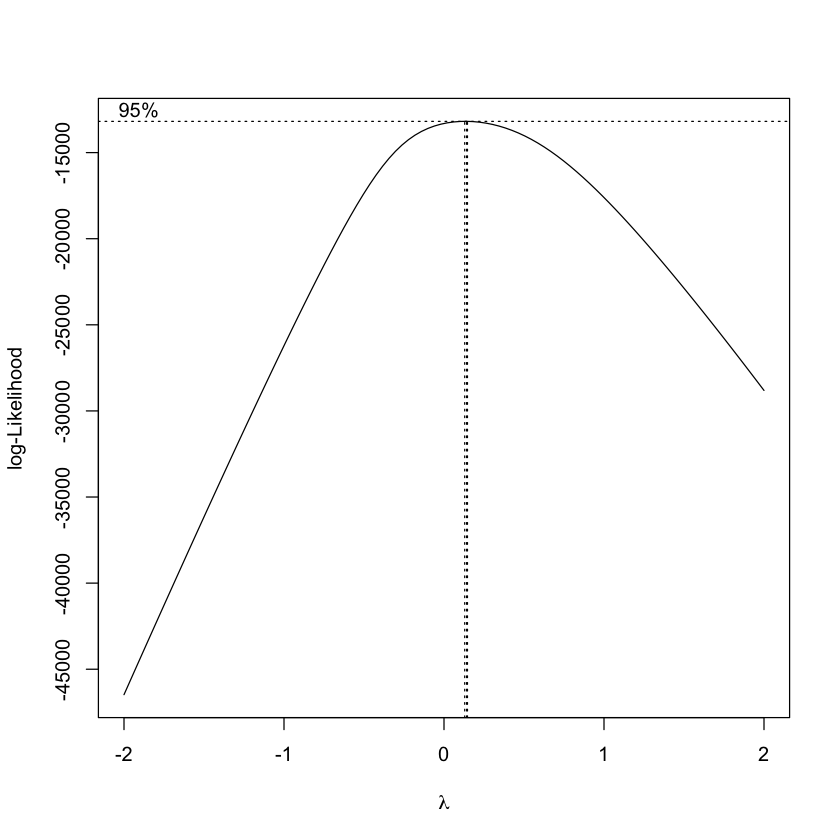

In [31]:
# Perform Box-Cox transformation on the shifted variable
boxcox_result <- boxcox(lm(shifted_TCAPOUT ~ TOTALREV + ENROLL + TCURINST, data = districts_AL), plotit = TRUE)

# Choose the optimal lambda value based on the Box-Cox plot
optimal_lambda <- boxcox_result$x[which.max(boxcox_result$y)]
cat("Optimal Lambda for Box-Cox Transformation:", optimal_lambda, "\n")

In [32]:
# Transform the shifted dependent variable using the optimal lambda value
districts_AL$transformed_TCAPOUT <- (districts_AL$shifted_TCAPOUT ^ optimal_lambda - 1) / optimal_lambda


Call:
lm(formula = transformed_TCAPOUT ~ TOTALREV + ENROLL + TCURINST, 
    data = districts_AL)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4468  -2.1753  -0.1556   2.0156  12.3256 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.106e+01  7.359e-02 150.299  < 2e-16 ***
TOTALREV     8.584e-05  1.043e-05   8.228 2.77e-16 ***
ENROLL       9.205e-05  2.412e-05   3.816 0.000138 ***
TCURINST    -1.044e-04  2.208e-05  -4.726 2.39e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.354 on 3122 degrees of freedom
Multiple R-squared:  0.4009,	Adjusted R-squared:  0.4003 
F-statistic: 696.3 on 3 and 3122 DF,  p-value: < 2.2e-16


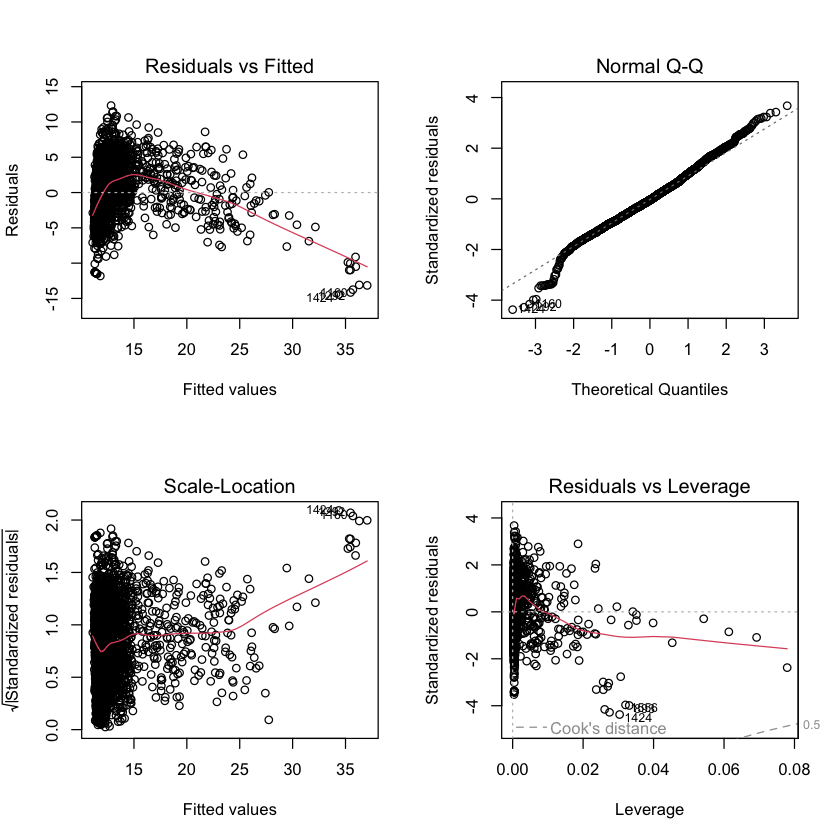

In [33]:
# Refit the model with the transformed variable
model_transformed <- lm(transformed_TCAPOUT ~ TOTALREV + ENROLL + TCURINST, data = districts_AL)

# View the summary of the transformed model
summary(model_transformed)

# Plot residuals for the transformed model
par(mfrow = c(2, 2))
plot(model_transformed)

#### Next Steps:
1. **Exploring Interaction and Polynomial Terms**: We can add interaction terms or higher-order polynomial terms to improve model fit. For example, if you suspect that **Total Revenue** (`TOTALREV`) and **Total Current Instructional Spending** (`TCURINST`) may interact, you can include an interaction term in the model:
2. **Weighted Least Squares (WLS) Regression**: If the Scale-Location Plot indicates that variance increases with fitted values, you can use a weighted regression approach to handle heteroscedasticity. This involves giving less weight to observations with higher variance. One way to find weights is by taking the inverse of the fitted values.
3. **Investigate High-Leverage Points**: Use the Cook’s Distance values to identify and investigate points that may have high leverage. Points with Cook’s distance greater than 0.5 or 1 may be worth examining.


Call:
lm(formula = transformed_TCAPOUT ~ TOTALREV * TCURINST + poly(TOTALREV, 
    2) + ENROLL, data = districts_AL)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4330  -1.9311  -0.0824   1.8701  11.6986 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.349e+01  7.035e-01  19.174  < 2e-16 ***
TOTALREV            7.611e-05  1.545e-05   4.925 8.87e-07 ***
TCURINST           -2.446e-04  3.262e-05  -7.499 8.35e-14 ***
poly(TOTALREV, 2)1         NA         NA      NA       NA    
poly(TOTALREV, 2)2 -2.214e+02  4.294e+01  -5.156 2.68e-07 ***
ENROLL              5.283e-05  2.225e-05   2.374 0.017637 *  
TOTALREV:TCURINST   4.639e-10  1.361e-10   3.408 0.000663 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.073 on 3120 degrees of freedom
Multiple R-squared:  0.4972,	Adjusted R-squared:  0.4964 
F-statistic:   617 on 5 and 3120 DF,  p-va

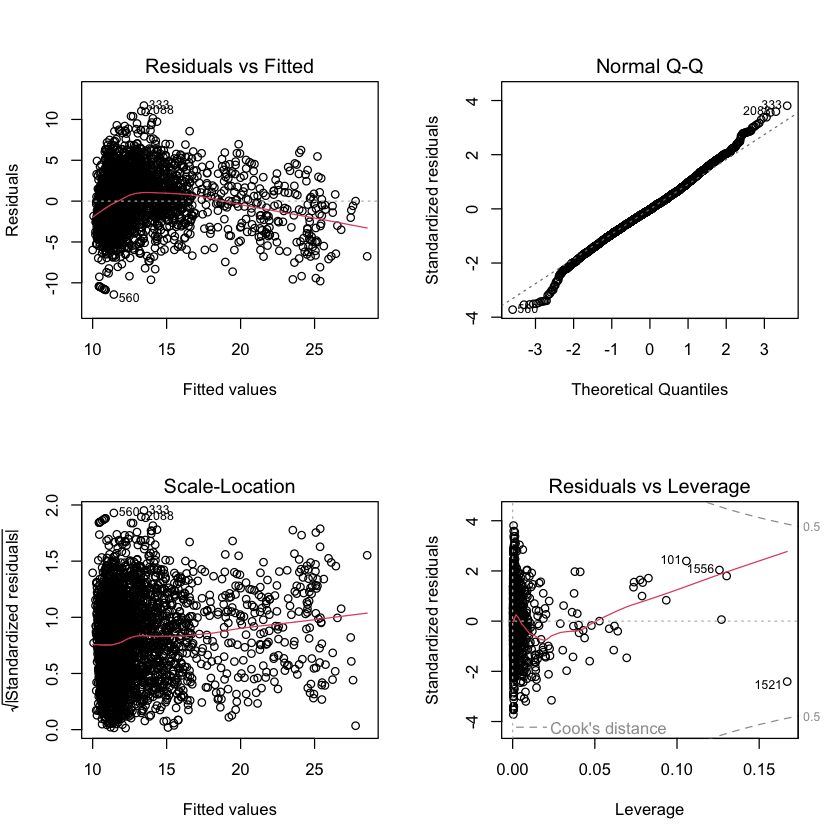

In [34]:
# Add interaction terms and polynomial terms to the model
model_interaction <- lm(transformed_TCAPOUT ~ TOTALREV * TCURINST + poly(TOTALREV, 2) + ENROLL, data = districts_AL)

# View model summary with interaction terms
summary(model_interaction)

# Plot residuals to check model fit
par(mfrow = c(2, 2))
plot(model_interaction)


Call:
lm(formula = transformed_TCAPOUT ~ TOTALREV + ENROLL + TCURINST, 
    data = districts_AL, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.0353 -0.1573  0.0064  0.1677  0.9301 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.046e+01  7.350e-02 142.329  < 2e-16 ***
TOTALREV     1.105e-04  1.528e-05   7.231 5.99e-13 ***
ENROLL       1.535e-04  3.458e-05   4.439 9.35e-06 ***
TCURINST    -1.468e-04  3.156e-05  -4.651 3.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2604 on 3122 degrees of freedom
Multiple R-squared:  0.2901,	Adjusted R-squared:  0.2894 
F-statistic: 425.2 on 3 and 3122 DF,  p-value: < 2.2e-16


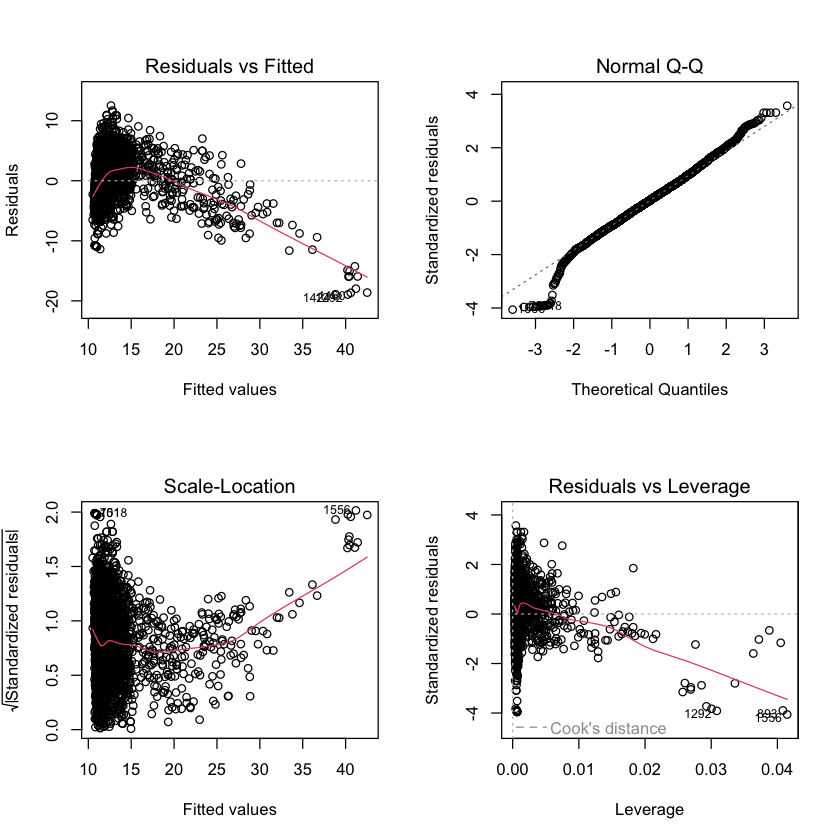

In [35]:
# Calculate weights based on fitted values from the previous model
weights <- 1 / fitted(model_interaction)^2

# Perform weighted least squares (WLS) regression
model_wls <- lm(transformed_TCAPOUT ~ TOTALREV + ENROLL + TCURINST, weights = weights, data = districts_AL)

# View model summary for WLS regression
summary(model_wls)

# Plot residuals for WLS model
par(mfrow = c(2, 2))
plot(model_wls)

In [36]:
# Calculate Cook's distance for the model
cooks_d <- cooks.distance(model_interaction)

# Identify points with high Cook's distance
high_leverage_points <- which(cooks_d > 0.5)  # Choose a threshold like 0.5 or 1

# Print high leverage points
cat("High Leverage Points (Cook's Distance > 0.5):\n")
print(high_leverage_points)

# Optionally, remove high-leverage points and refit the model
districts_cleaned <- districts_AL[-high_leverage_points, ]

# Refit the model without high-leverage points
model_cleaned <- lm(transformed_TCAPOUT ~ TOTALREV + ENROLL + TCURINST, data = districts_cleaned)

# View summary of cleaned model
summary(model_cleaned)

# Plot residuals of the cleaned model
par(mfrow = c(2, 2))
plot(model_cleaned)

High Leverage Points (Cook's Distance > 0.5):
named integer(0)


ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


### Step 5: Perform ANOVA

**ANOVA** (Analysis of Variance) is used to compare the significance of predictors in the model by examining the ratio of explained variance to unexplained variance. Let’s interpret the output for both the original and transformed models.

In [38]:
# Perform ANOVA on the original and transformed models
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOTALREV,1,131336732756,131336732756,3032.35435,0.000000e+00
ENROLL,1,869557959,869557959,20.07670,7.706982e-06
TCURINST,1,2003444033,2003444033,46.25631,1.238352e-11
Residuals,3122,135219447527,43311803,NA,NA


#### Original Model ANOVA Interpretation

- **TOTALREV**: The F-value is **3032.35** with a p-value of **< 0.0001**, indicating that **Total Revenue** is a highly significant predictor of **Capital Outlay Expenditure** in the original model.
- **ENROLL**: The F-value is **20.08** with a p-value of **7.71e-06**, suggesting that **Enrollment** is statistically significant, but not as strong a predictor as **TOTALREV**.
- **TCURINST**: The F-value is **46.26** with a p-value of **1.24e-11**, indicating that **Total Current Instructional Spending** is a statistically significant predictor of **Capital Outlay Expenditure**.


In [39]:
anova(model_transformed)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOTALREV,1,23203.95991,23203.95991,2063.254532,0.000000e+00
ENROLL,1,36.04221,36.04221,3.204808,7.351898e-02
TCURINST,1,251.22663,251.22663,22.338622,2.386717e-06
Residuals,3122,35110.91904,11.24629,NA,NA


#### Transformed Model ANOVA Interpretation

- **TOTALREV**: The F-value is **2063.25** with a p-value of **< 0.0001**, indicating that **Total Revenue** remains a highly significant predictor in the transformed model.
- **ENROLL**: The F-value is **3.20** with a p-value of **0.074**, indicating that **Enrollment** is not as strong of a predictor after transformation, with borderline significance.
- **TCURINST**: The F-value is **22.34** with a p-value of **2.39e-06**, indicating that **Total Current Instructional Spending** remains a statistically significant predictor in the transformed model.


The results indicate that **Total Revenue** remains a dominant predictor in both the original and transformed models. However, the **transformed model** shows reduced significance for **Enrollment**, suggesting that it might not be as reliable a predictor. Further investigation into interactions or alternative modeling approaches may be needed.

In [40]:
anova(model_interaction)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOTALREV,1,23203.95991,23203.959911,2457.007432,0.000000e+00
TCURINST,1,123.51742,123.517419,13.078941,3.033633e-04
"poly(TOTALREV, 2)",1,5630.08609,5630.086090,596.155286,1.219622e-120
ENROLL,1,69.63567,69.635668,7.373541,6.655511e-03
TOTALREV:TCURINST,1,109.69191,109.691909,11.614993,6.625147e-04
Residuals,3120,29465.25679,9.443993,NA,NA


#### Interaction Model ANOVA Interpretation

- **TOTALREV**: The F-value is **2457.01** with a p-value of **< 0.0001**, indicating that **Total Revenue** remains a highly significant predictor of **Capital Outlay Expenditure**.
- **TCURINST**: The F-value is **13.08** with a p-value of **3.03e-04**, indicating that **Total Current Instructional Spending** is still a significant predictor in the interaction model.
- **poly(TOTALREV, 2)**: The F-value is **596.16** with a p-value of **< 2e-16**, indicating that the quadratic term of **Total Revenue** significantly contributes to explaining **Capital Outlay Expenditure**. This suggests a non-linear relationship between **Total Revenue** and **Capital Outlay Expenditure**.
- **ENROLL**: The F-value is **7.37** with a p-value of **6.66e-03**, indicating that **Enrollment** is statistically significant in the interaction model, albeit weaker than other predictors.
- **TOTALREV:TCURINST**: The F-value is **11.61** with a p-value of **6.63e-04**, indicating that there is a significant interaction effect between **Total Revenue** and **Total Current Instructional Spending**. This means that the effect of **Total Revenue** on **Capital Outlay Expenditure** depends on the level of **Total Current Instructional Spending**.

#### Key Takeaways from the Interaction Model

1. **Significance of Total Revenue and Its Quadratic Term**:
   - The significance of **poly(TOTALREV, 2)** confirms that there is a non-linear relationship between **Total Revenue** and **Capital Outlay Expenditure**. The inclusion of this quadratic term improves the model’s ability to explain the variance.

2. **Interaction Between Total Revenue and Current Instructional Spending**:
   - The significant interaction term (**TOTALREV:TCURINST**) suggests that the impact of **Total Revenue** on **Capital Outlay Expenditure** changes depending on the level of **Total Current Instructional Spending**. This highlights the importance of considering interactions in understanding complex relationships.

3. **Enrollment Remains Statistically Significant**:
   - While **Enrollment** was not significant in the transformed model alone, the inclusion of interaction and polynomial terms makes it statistically significant, albeit with a smaller effect size compared to **Total Revenue** and **Current Instructional Spending**.


The interaction model provides a better understanding of the non-linear and interactive effects between **Total Revenue** and **Total Current Instructional Spending** on **Capital Outlay Expenditure**. The significant interaction term indicates that these two predictors are not independent and their combined effect should be considered in decision-making. Additionally, the inclusion of a quadratic term confirms the non-linear relationship between **Total Revenue** and **Capital Outlay Expenditure**.

Further residual analysis and diagnostic checks can help validate the improvements made by this interaction model.

### Step 6: Predict New Data

Predict new values using the final model and interpret the results.

In [41]:
# Create a new dataset for prediction
new_data <- data.frame(
  TOTALREV = 500000,
  ENROLL = 10000,
  TCURINST = 200000
)

# Predict using the final model
predicted_values <- predict(model_interaction, newdata = new_data)
predicted_values

Warning message in predict.lm(model_interaction, newdata = new_data):
“prediction from a rank-deficient fit may be misleading”


1 
21.44111

In [44]:
cor(districts_AL[,-c(1,3)])

,ENROLL,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,shifted_TCAPOUT,transformed_TCAPOUT
ENROLL,1.000000000,-0.009517698,0.9364537,0.8600354,0.9548490,0.8455463,0.9296754,0.9478438,0.9067692,0.9134215,0.63388978,0.63388978,0.59796449
YRDATA,-0.009517698,1.000000000,0.1733304,0.1796846,0.1500269,0.1898900,0.1714580,0.1629319,0.1972852,0.1425287,0.09060294,0.09060294,0.06810413
TOTALREV,0.936453688,0.173330398,1.0000000,0.9201061,0.9864364,0.9527713,0.9935608,0.9956756,0.9894841,0.9399374,0.69818544,0.69818544,0.62925154
TFEDREV,0.860035373,0.179684563,0.9201061,1.0000000,0.9181192,0.8069140,0.9155238,0.9145868,0.9403589,0.8636208,0.60281577,0.60281577,0.49706888
TSTREV,0.954848953,0.150026926,0.9864364,0.9181192,1.0000000,0.8952373,0.9798931,0.9881524,0.9739543,0.9432090,0.66914300,0.66914300,0.61336165
TLOCREV,0.845546311,0.189890016,0.9527713,0.8069140,0.8952373,1.0000000,0.9464563,0.9401042,0.9354602,0.8716358,0.70882800,0.70882800,0.63943020
TOTALEXP,0.929675409,0.171457959,0.9935608,0.9155238,0.9798931,0.9464563,1.0000000,0.9922658,0.9881366,0.9413420,0.75719290,0.75719290,0.65481488
TCURINST,0.947843846,0.162931865,0.9956756,0.9145868,0.9881524,0.9401042,0.9922658,1.0000000,0.9846865,0.9421743,0.68561121,0.68561121,0.62226548
TCURSSVC,0.906769189,0.197285244,0.9894841,0.9403589,0.9739543,0.9354602,0.9881366,0.9846865,1.0000000,0.9255574,0.68267522,0.68267522,0.59453227
TCURONON,0.913421485,0.142528721,0.9399374,0.8636208,0.9432090,0.8716358,0.9413420,0.9421743,0.9255574,1.0000000,0.63845692,0.63845692,0.58353473
